In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.decomposition import PCA
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
#rcParams['figure.figsize'] = 80,50

In [2]:
#Preprocess training set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/labels.csv')

labelsTrain = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTrain.drop(columns =[0,2], inplace = True)
labelsTrain.columns = ["img_name"  , "smiling"]
labelsTrain = labelsTrain.astype({'smiling': 'int32'})
labelsTrain = labelsTrain.astype({'img_name': 'string'})

#Preprocess testing set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/labels.csv')

labelsTest = data["\timg_name\tgender\tsmiling"].str.split(pat="\t", n=-1, expand=True)
labelsTest.drop(columns =[0,2], inplace = True)
labelsTest.columns = ["img_name"  , "smiling"]
labelsTest = labelsTest.astype({'smiling': 'int32'})
labelsTest = labelsTest.astype({'img_name': 'string'})


In [3]:
#Load training set################################
imagesTrain = np.zeros((5000, 218, 178))

for i in range(0,5000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba/img/' + labelsTrain["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTrain[i] = image
    
imagesTrain = imagesTrain.reshape(5000,38804)    
imagesTrain = pd.DataFrame(imagesTrain) 


#Load Testing set################################
imagesTest = np.zeros((1000, 218, 178))

for i in range(0,1000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/celeba_test/img/' + labelsTest["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTest[i] = image
    
imagesTest = imagesTest.reshape(1000,38804)   

imagesTest = pd.DataFrame(imagesTest) 

In [16]:
#scale coversion
scaler = MinMaxScaler()

imagesTrain_scaled = scaler.fit_transform(imagesTrain)
imagesTest_scaled = scaler.transform(imagesTest)


In [18]:

#PCA conversion
pca = PCA(n_components = 250)

imagesTrain_pca = pca.fit_transform(imagesTrain_scaled)
imagesTest_pca = pca.transform(imagesTest_scaled)

imagesTrain_pca = pd.DataFrame(imagesTrain_pca) 
imagesTest_pca = pd.DataFrame(imagesTest_pca) 

In [8]:
#decision tree##### 
model = tree.DecisionTreeClassifier(max_depth=5,criterion = 'gini')
model.fit(imagesTrain_pca,labelsTrain['smiling'])
model.score(imagesTest_pca,labelsTest['smiling'])

0.813

In [26]:
#random forest
for i in range(1,301,10):
    model = RandomForestClassifier(n_estimators = i , n_jobs = -1)
    model.fit(imagesTrain_pca,labelsTrain['smiling'])
    print(model.score(imagesTest_pca,labelsTest['smiling']))

0.575
0.658
0.687
0.709
0.738
0.727
0.734
0.756
0.772
0.763
0.777
0.772
0.776
0.793
0.78
0.799
0.785
0.789
0.779
0.804
0.793
0.803
0.801
0.8
0.799
0.798
0.801
0.816
0.802
0.811


In [197]:
hyper_params = {
    #'max_features' : [i*5 for i in range(1,30)],
    'max_depth' : [3,6,7]
}

In [198]:
model = tree.DecisionTreeClassifier()
grid=GridSearchCV(model , param_grid=hyper_params , cv=10 , n_jobs=-1)

In [199]:
grid.fit(imagesTrain_scaled,labelsTrain['smiling'])

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 6, 7]})

In [206]:
grid.best_index_

1

[Text(0.5, 0.8333333333333334, 'X[0] <= -0.221\ngini = 0.5\nsamples = 5000\nvalue = [2500, 2500]'),
 Text(0.25, 0.5, 'X[0] <= -0.49\ngini = 0.041\nsamples = 2488\nvalue = [2436, 52]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.03\nsamples = 2452\nvalue = [2415, 37]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.486\nsamples = 36\nvalue = [21, 15]'),
 Text(0.75, 0.5, 'X[0] <= 0.361\ngini = 0.05\nsamples = 2512\nvalue = [64, 2448]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.493\nsamples = 77\nvalue = [34, 43]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.024\nsamples = 2435\nvalue = [30, 2405]')]

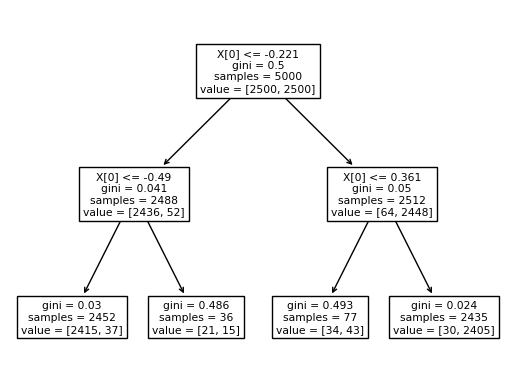

In [16]:
plot_tree(model)